https://github.com/RicardDurall/Benchmarking-Strategies-for-Asset-Allocation

Asset Allocation: From Markowitz to Deep Reinforcement Learning


In [ ]:
! pip install --upgrade pandas-datareader
! pip install stable_baselines3

Restart after this



# Preprocessing

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

### Select the tickers and timeframe

In [2]:
# ! git clone https://github.com/RicardDurall/Benchmarking-Strategies-for-Asset-Allocation

In [3]:
# ! cp /content/Benchmarking-Strategies-for-Asset-Allocation/deepRL.py /content


In [46]:
# tickers = ["URTH", "BNDX"]
# tickers = ['AAPL', "GE",'JPM', 'MSFT', 'VOD', 'NKE','NVDA',"MMM"]
tickers = ['ABB', 'ASSA-B.ST', 'AZN', 'ATCO-A.ST', 'ATCO-B.ST', 'ALIV-SDB.ST', 'BOL.ST',
           'ELUX-B.ST', 'ERIC-B.ST', 'GETI-B.ST', 'HM-B.ST', 'HEXA-B.ST', 'INVE-B.ST', 'KINV-B.ST',
           'NDA-SE.ST', 'SAND', 'SECU-B.ST', 'SEB-A.ST', 'SKA-B.ST', 'SKF-B.ST', 'SSAB-A.ST',
           'SCA-B.ST', 'SHB-A.ST', 'SWED-A.ST', 'SWMA.ST', 'TEL2-B.ST', 'TELIA.ST', 'VOLV-B.ST'   
           ]

In [47]:
# tickers = ["URTH", "BNDX"]


In [48]:
# start_date = '2003-01-01'
start_date = '2019-01-01'
end_date = "2022-11-20"
# this is bull market
df = pdr.get_data_yahoo([tickers][0], start=start_date, end=end_date)

In [50]:
df =df1

In [ ]:
# collective_df =  df['AAPL'], df['GE'], df['JPM'], df['MSFT'], df['VOD'], df['NKE'], df['NVDA'], df['MMM']
# collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 


In [51]:
# bear market 
##  1st of January 2003 to the 1st of January 2010

# bull market
## 2010-01-01 to end="2017-01-01"
data = df.copy()
# we copy the neighbour values to NaN entries
data['Adj Close'] = data['Adj Close'].ffill()
df = df.bfill(axis=1)
data['Adj Close'] = data['Adj Close'].bfill()
df = df.bfill(axis=1)

data = data['Adj Close']
data.head(2)

Symbols,ABB,ASSA-B.ST,AZN,ATCO-A.ST,ATCO-B.ST,ALIV-SDB.ST,BOL.ST,ELUX-B.ST,ERIC-B.ST,GETI-B.ST,...,SKA-B.ST,SKF-B.ST,SSAB-A.ST,SCA-B.ST,SHB-A.ST,SWED-A.ST,SWMA.ST,TEL2-B.ST,TELIA.ST,VOLV-B.ST
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,16.572153,145.616409,33.967098,43.10817,40.497284,623.159241,153.751801,136.197922,71.138885,74.705124,...,125.083702,115.386543,25.970684,67.170303,79.54538,149.176437,31.696701,78.326721,33.130856,94.157372
2019-01-02,16.563435,145.616409,33.806118,43.10817,40.497284,623.159241,153.751801,136.197922,71.138885,74.705124,...,125.083702,115.386543,25.970684,67.170303,79.54538,149.176437,31.696701,78.326721,33.130856,94.157372


In [52]:
data

Symbols,ABB,ASSA-B.ST,AZN,ATCO-A.ST,ATCO-B.ST,ALIV-SDB.ST,BOL.ST,ELUX-B.ST,ERIC-B.ST,GETI-B.ST,...,SKA-B.ST,SKF-B.ST,SSAB-A.ST,SCA-B.ST,SHB-A.ST,SWED-A.ST,SWMA.ST,TEL2-B.ST,TELIA.ST,VOLV-B.ST
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,16.572153,145.616409,33.967098,43.108170,40.497284,623.159241,153.751801,136.197922,71.138885,74.705124,...,125.083702,115.386543,25.970684,67.170303,79.545380,149.176437,31.696701,78.326721,33.130856,94.157372
2019-01-02,16.563435,145.616409,33.806118,43.108170,40.497284,623.159241,153.751801,136.197922,71.138885,74.705124,...,125.083702,115.386543,25.970684,67.170303,79.545380,149.176437,31.696701,78.326721,33.130856,94.157372
2019-01-03,16.232166,144.169571,34.280125,42.001785,39.369461,606.343872,150.365051,133.172913,69.128471,73.582161,...,124.994965,114.028030,25.348068,65.086433,79.609856,149.289413,32.421665,79.000114,33.586647,92.892700
2019-01-04,16.816246,147.716660,35.040310,44.562862,41.781754,618.609131,159.703262,136.635254,70.788437,74.096062,...,128.322845,119.593567,26.610355,67.774025,81.237839,153.356842,33.008980,80.063377,33.751671,97.013092
2019-01-07,16.755222,149.163483,34.682579,45.484856,42.596294,623.752686,162.004944,138.129532,72.042648,75.694855,...,129.787094,124.063538,26.857697,67.968781,80.367432,153.582809,32.880505,79.567184,33.641651,95.993195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,31.360001,242.656219,63.910000,133.979996,119.059998,912.746765,377.750000,152.539993,64.250000,243.399994,...,184.300003,181.949997,58.580002,138.449997,104.250000,164.100006,115.050003,92.739998,29.660000,192.119995
2022-11-15,31.309999,241.565842,63.950001,130.759995,117.000000,931.333435,378.799988,148.740005,64.779999,244.500000,...,183.050003,178.850006,57.840000,138.100006,105.500000,165.000000,115.050003,92.440002,29.290001,191.080002
2022-11-16,30.820000,236.312256,63.799999,127.879997,115.099998,897.757507,374.350006,142.759995,63.669998,242.800003,...,179.850006,172.800003,57.200001,139.550003,106.449997,166.949997,115.349998,92.760002,29.170000,189.119995


### We check that tehre are no NAN values

In [53]:
data.isna().sum()

Symbols
ABB            0
ASSA-B.ST      0
AZN            0
ATCO-A.ST      0
ATCO-B.ST      0
ALIV-SDB.ST    0
BOL.ST         0
ELUX-B.ST      0
ERIC-B.ST      0
GETI-B.ST      0
HM-B.ST        0
HEXA-B.ST      0
INVE-B.ST      0
KINV-B.ST      0
NDA-SE.ST      0
SAND           0
SECU-B.ST      0
SEB-A.ST       0
SKA-B.ST       0
SKF-B.ST       0
SSAB-A.ST      0
SCA-B.ST       0
SHB-A.ST       0
SWED-A.ST      0
SWMA.ST        0
TEL2-B.ST      0
TELIA.ST       0
VOLV-B.ST      0
dtype: int64

### Check if all tickers have the same number of data points

In [54]:
no_datasets = []
for i in tickers:
    no_data_points = len(data[i])
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

data_points_df.head()

,0,1
0,ABB,1005
1,ASSA-B.ST,1005
2,AZN,1005
3,ATCO-A.ST,1005
4,ATCO-B.ST,1005


### Define the start-end dates for the training and testing data

In [55]:
train_pct = 0.8
samples_train = int(train_pct*len(data))
data_train = data[:samples_train]
data_test = data[samples_train:]

In [56]:
data_test.head(1)

Symbols,ABB,ASSA-B.ST,AZN,ATCO-A.ST,ATCO-B.ST,ALIV-SDB.ST,BOL.ST,ELUX-B.ST,ERIC-B.ST,GETI-B.ST,...,SKA-B.ST,SKF-B.ST,SSAB-A.ST,SCA-B.ST,SHB-A.ST,SWED-A.ST,SWMA.ST,TEL2-B.ST,TELIA.ST,VOLV-B.ST
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-10,34.288132,268.647278,57.242256,117.482552,102.174202,945.966736,379.974609,173.042755,112.76725,371.434021,...,238.914474,186.891129,52.734196,163.454117,93.207069,169.353027,72.995697,120.186417,35.491638,208.573288


### Visualization

In [57]:
data

Symbols,ABB,ASSA-B.ST,AZN,ATCO-A.ST,ATCO-B.ST,ALIV-SDB.ST,BOL.ST,ELUX-B.ST,ERIC-B.ST,GETI-B.ST,...,SKA-B.ST,SKF-B.ST,SSAB-A.ST,SCA-B.ST,SHB-A.ST,SWED-A.ST,SWMA.ST,TEL2-B.ST,TELIA.ST,VOLV-B.ST
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,16.572153,145.616409,33.967098,43.108170,40.497284,623.159241,153.751801,136.197922,71.138885,74.705124,...,125.083702,115.386543,25.970684,67.170303,79.545380,149.176437,31.696701,78.326721,33.130856,94.157372
2019-01-02,16.563435,145.616409,33.806118,43.108170,40.497284,623.159241,153.751801,136.197922,71.138885,74.705124,...,125.083702,115.386543,25.970684,67.170303,79.545380,149.176437,31.696701,78.326721,33.130856,94.157372
2019-01-03,16.232166,144.169571,34.280125,42.001785,39.369461,606.343872,150.365051,133.172913,69.128471,73.582161,...,124.994965,114.028030,25.348068,65.086433,79.609856,149.289413,32.421665,79.000114,33.586647,92.892700
2019-01-04,16.816246,147.716660,35.040310,44.562862,41.781754,618.609131,159.703262,136.635254,70.788437,74.096062,...,128.322845,119.593567,26.610355,67.774025,81.237839,153.356842,33.008980,80.063377,33.751671,97.013092
2019-01-07,16.755222,149.163483,34.682579,45.484856,42.596294,623.752686,162.004944,138.129532,72.042648,75.694855,...,129.787094,124.063538,26.857697,67.968781,80.367432,153.582809,32.880505,79.567184,33.641651,95.993195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,31.360001,242.656219,63.910000,133.979996,119.059998,912.746765,377.750000,152.539993,64.250000,243.399994,...,184.300003,181.949997,58.580002,138.449997,104.250000,164.100006,115.050003,92.739998,29.660000,192.119995
2022-11-15,31.309999,241.565842,63.950001,130.759995,117.000000,931.333435,378.799988,148.740005,64.779999,244.500000,...,183.050003,178.850006,57.840000,138.100006,105.500000,165.000000,115.050003,92.440002,29.290001,191.080002
2022-11-16,30.820000,236.312256,63.799999,127.879997,115.099998,897.757507,374.350006,142.759995,63.669998,242.800003,...,179.850006,172.800003,57.200001,139.550003,106.449997,166.949997,115.349998,92.760002,29.170000,189.119995


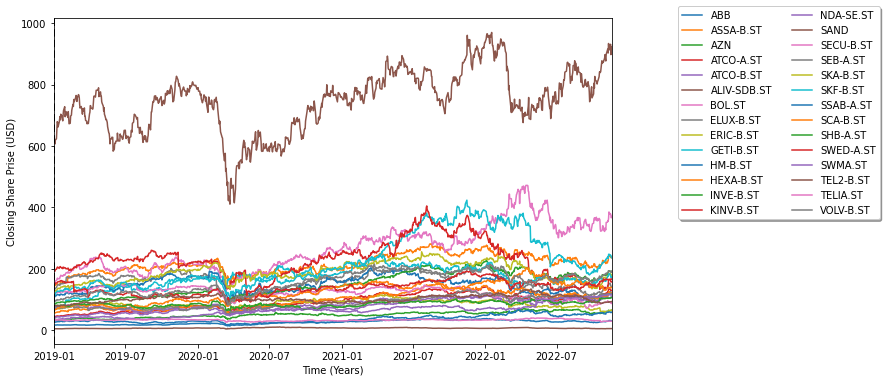

In [58]:
plt.rcParams["figure.figsize"] = (10,6)
for i in tickers:
    plt.plot(data[i], label=i)

# only one line may be specified; full height
plt.axvline(pd.to_datetime(start_date), color='black', linestyle='--', lw=2)
# plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1.05), ncol=2, fancybox=True, shadow=True)
plt.margins(x=0)
plt.ylabel("Closing Share Prise (USD)")
plt.xlabel("Time (Years)")
plt.savefig('data0.png',bbox_inches='tight')

# -----------------------------------------------
# ----------------------------------------------- 

# Evaluating models

## Deep Reinfrocement Learning

In [ ]:
! copy "Benchmarking-Strategies-for-Asset-Allocation\deepRL.py" ".\"


In [36]:
import numpy as np
import random
from deepRL import StockEnvTrade, train, DRL_prediction
from stable_baselines3.common.vec_env import DummyVecEnv

In [59]:
rebalance_period = 1
re_df = data.iloc[::rebalance_period, :]
train_re_df = data_train.iloc[::rebalance_period, :]
test_re_df = data_test.iloc[::rebalance_period, :]

In [60]:
timesteps = 25000
runs = 3

# timesteps  = 10000
# runs = 1


policy = "MlpPolicy"
length = test_re_df.shape[0]
stocks = test_re_df.shape[1]

### PPO

In [61]:
algo = "PPO"
Cumulative_returns_daily_drl_ppo = np.zeros([runs, length])
portfolio_weights_ppo = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):
    print("started ",i)
    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_ppo[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_ppo[i])
    cont = cont +1
    print("working:",check,"   ",length)
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo[i]),axis=1)
    Cumulative_returns_daily_drl_ppo[i] = (1+return_stocks_ppo).cumprod()
    i = i+1

started  0
Training time:  0.6513193408648174  minutes
working: 201.0     201
started  1
Training time:  0.6404524962107341  minutes
working: 201.0     201
started  2
Training time:  0.6230656027793884  minutes
working: 201.0     201


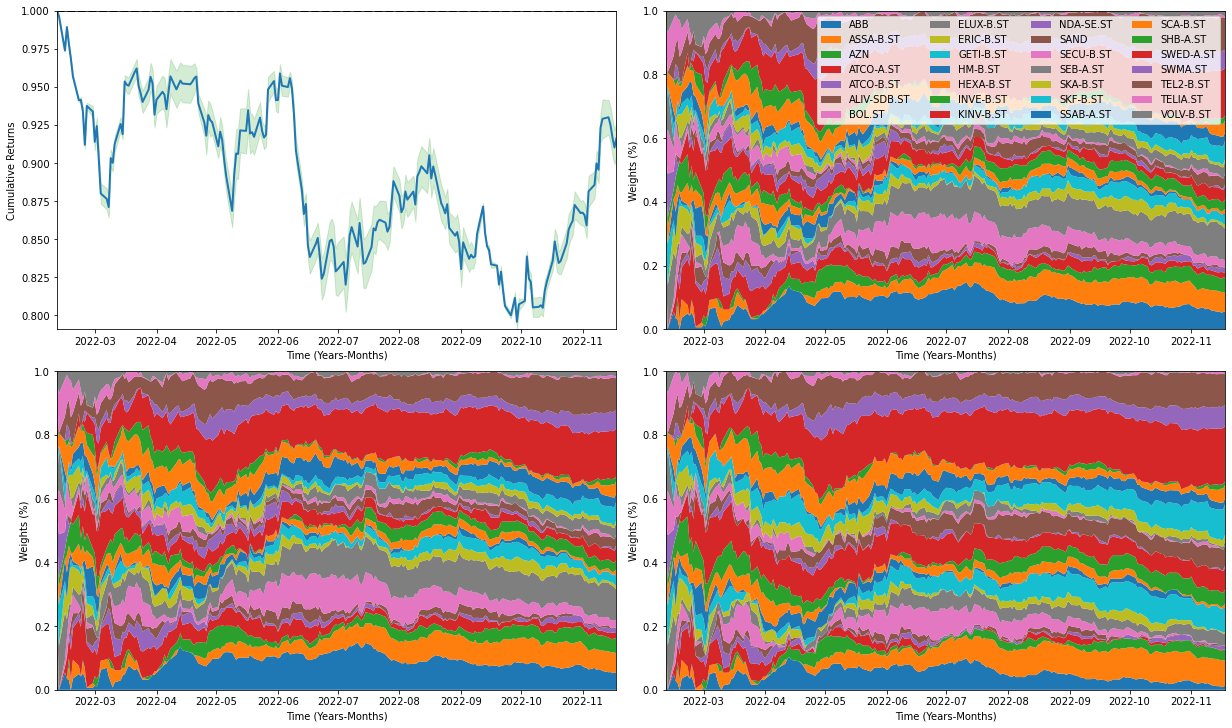

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

ppo_mean = np.mean(np.array(Cumulative_returns_daily_drl_ppo),axis=0)
ppo_std = np.std(np.array(Cumulative_returns_daily_drl_ppo),axis=0)

axs[0,0].plot(test_re_df.index, ppo_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, ppo_mean - ppo_std, ppo_mean + ppo_std, alpha=0.2, color='tab:green')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ppo_ = np.mean(np.array(portfolio_weights_ppo),axis=0)
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right', ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)
axs[1,0].stackplot(test_re_df.index, collective_df, labels=tickers)
# axs[1,0].legend(loc='upper right')
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[1,1].stackplot(test_re_df.index, collective_df, labels=tickers)
# axs[1,1].legend(loc='upper right')
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")
# plt.show()
plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### A2C

In [65]:
algo = "A2C"
Cumulative_returns_daily_drl_a2c = np.zeros([runs, length])
portfolio_weights_a2c = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_a2c[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_a2c[i]) 
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c[i]),axis=1)
    Cumulative_returns_daily_drl_a2c[i] = (1+return_stocks_a2c).cumprod()
    i = i+1

Training time:  0.6695968866348266  minutes
Training time:  0.6474304119745891  minutes
Training time:  0.6267126043637593  minutes


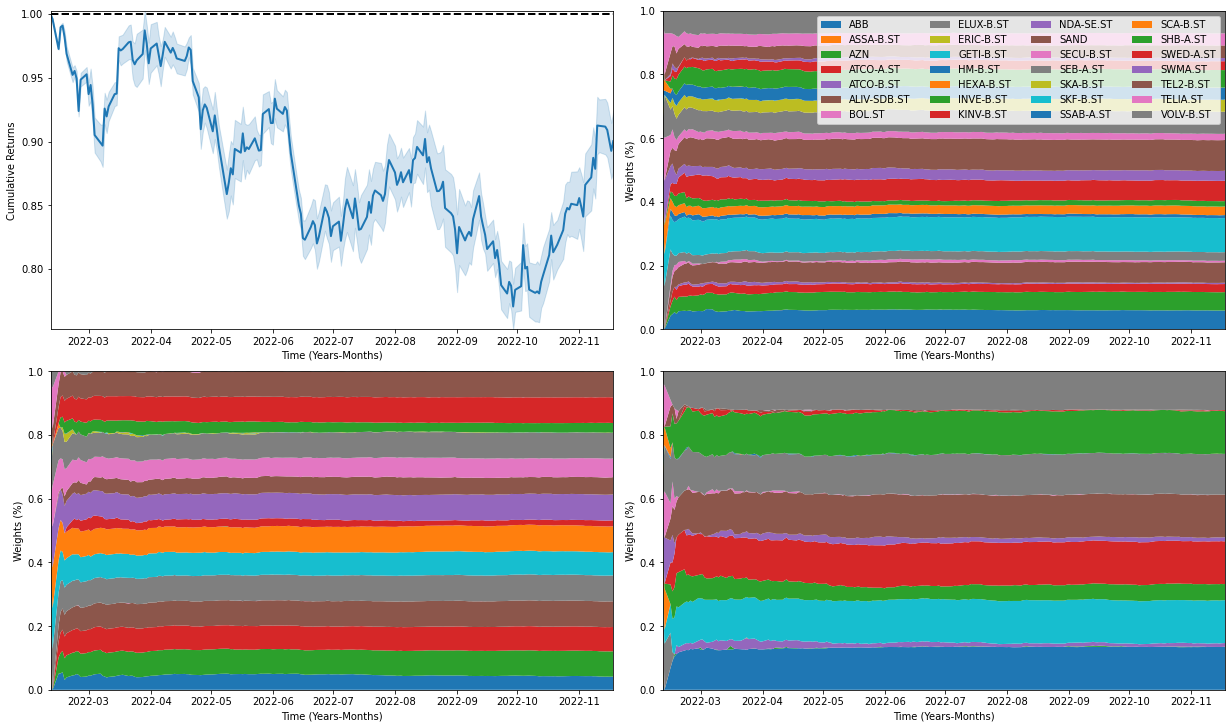

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

a2c_mean = np.mean(np.array(Cumulative_returns_daily_drl_a2c),axis=0)
a2c_std = np.std(np.array(Cumulative_returns_daily_drl_a2c),axis=0)

axs[0,0].plot(test_re_df.index, a2c_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, a2c_mean - a2c_std, a2c_mean + a2c_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_a2c_ = np.mean(np.array(portfolio_weights_a2c),axis=0)
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[0,1].stackplot(test_re_df.index,collective_df, labels=tickers)
axs[0,1].legend(loc='upper right', ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[1,0].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[1,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### DDPG

In [67]:
algo = "DDPG"
Cumulative_returns_daily_drl_ddpg = np.zeros([runs, length])
portfolio_weights_ddpg = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_ddpg[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_ddpg[i]) 
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg[i]),axis=1)
    Cumulative_returns_daily_drl_ddpg[i] = (1+return_stocks_ddpg).cumprod()
    i = i+1

Training time:  5.382898461818695  minutes
Training time:  5.417932132879893  minutes
Training time:  5.308457525571187  minutes


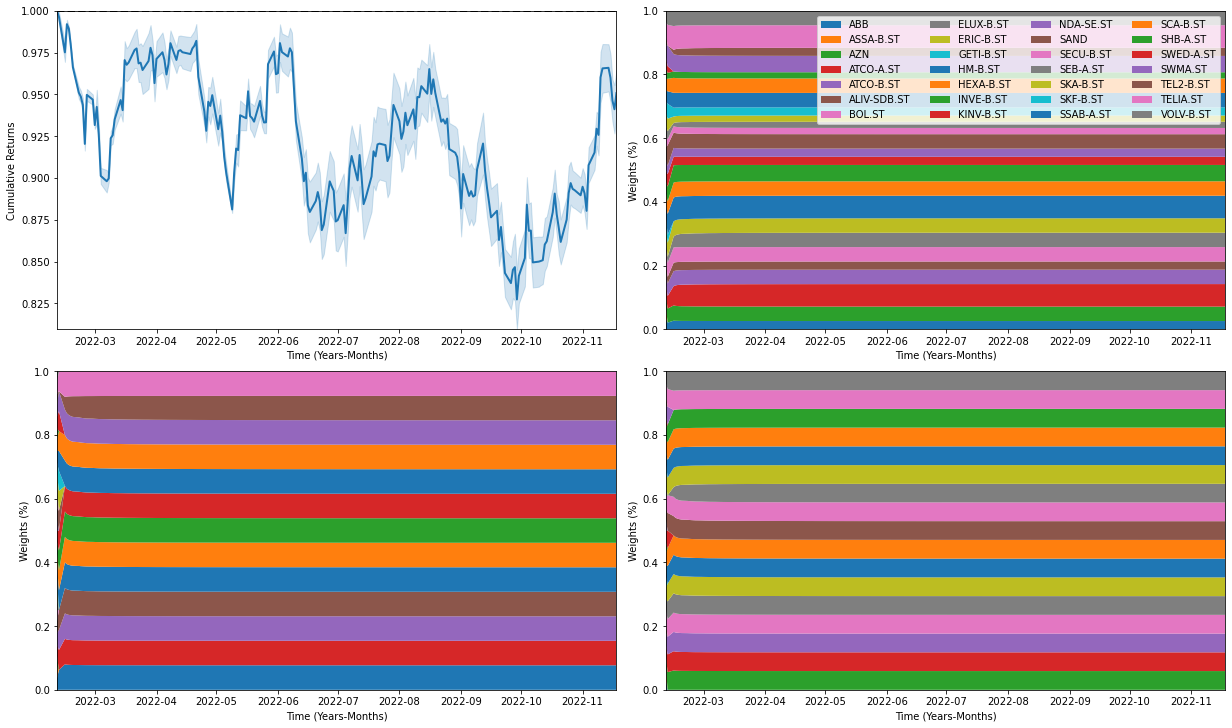

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

ddpg_mean = np.mean(np.array(Cumulative_returns_daily_drl_ddpg),axis=0)
ddpg_std = np.std(np.array(Cumulative_returns_daily_drl_ddpg),axis=0)

axs[0,0].plot(test_re_df.index, ddpg_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, ddpg_mean - ddpg_std, ddpg_mean + ddpg_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ddgpc_ = np.mean(np.array(portfolio_weights_ddpg),axis=0)
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right',ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_ddgpc_ = portfolio_weights_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[1,0].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ddgpc_ = portfolio_weights_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[1,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### SAC

In [69]:
algo = "SAC"
Cumulative_returns_daily_drl_sac = np.zeros([runs, length])
portfolio_weights_sac = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_sac[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_sac[i]) 
    cont = cont +1
    if check != length:
        continue
    
    return_stocks = test_re_df.pct_change()
    return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac[i]),axis=1)
    Cumulative_returns_daily_drl_sac[i] = (1+return_stocks_sac).cumprod()
    i = i+1

Training time:  8.919811968008677  minutes
Training time:  8.905748422940572  minutes
Training time:  8.998939236005148  minutes


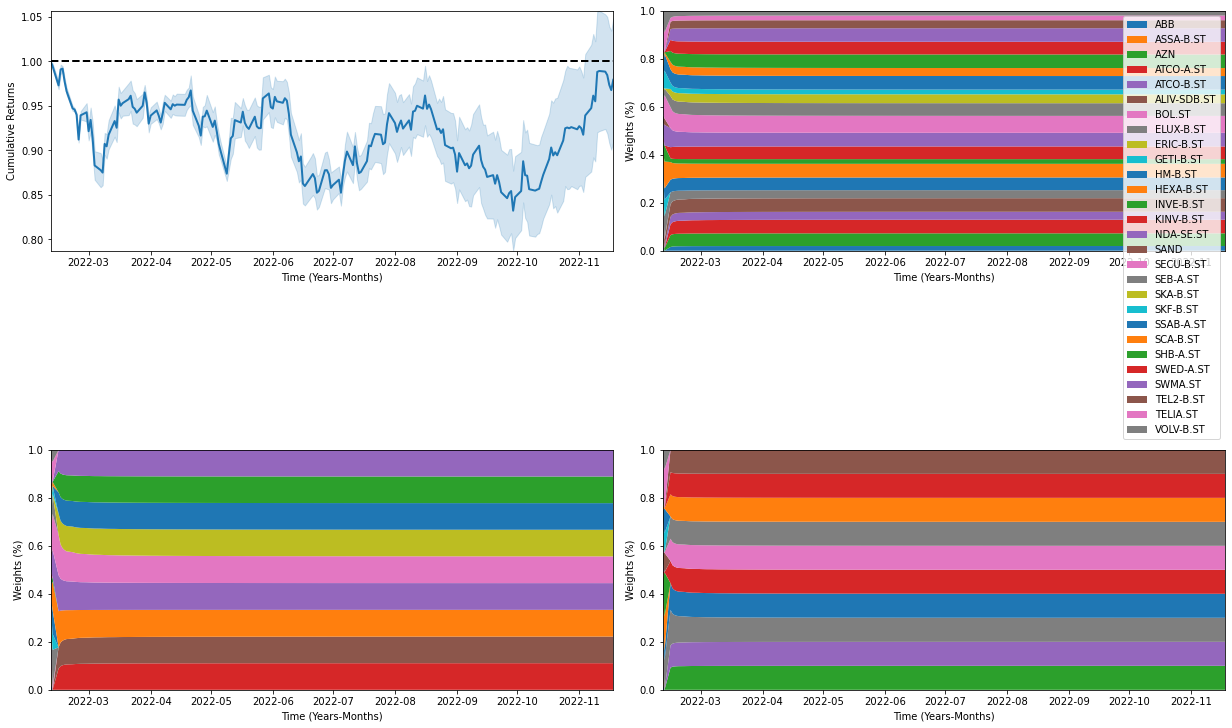

In [70]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

sac_mean = np.mean(np.array(Cumulative_returns_daily_drl_sac),axis=0)
sac_std = np.std(np.array(Cumulative_returns_daily_drl_sac),axis=0)

axs[0,0].plot(test_re_df.index, sac_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, sac_mean - sac_std, sac_mean + sac_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_sac_ = np.mean(np.array(portfolio_weights_sac),axis=0)
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right', ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_sac_ = portfolio_weights_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[1,0].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_sac_ = portfolio_weights_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[1,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### TD3

In [71]:
algo = "TD3"
Cumulative_returns_daily_drl_td3 = np.zeros([runs, length])
portfolio_weights_td3 = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_td3[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_td3[i])
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3[i]),axis=1)
    Cumulative_returns_daily_drl_td3[i] = (1+return_stocks_td3).cumprod()
    i = i+1

Training time:  5.444554356733958  minutes
Training time:  5.422639028231303  minutes
Training time:  5.4310781518618265  minutes


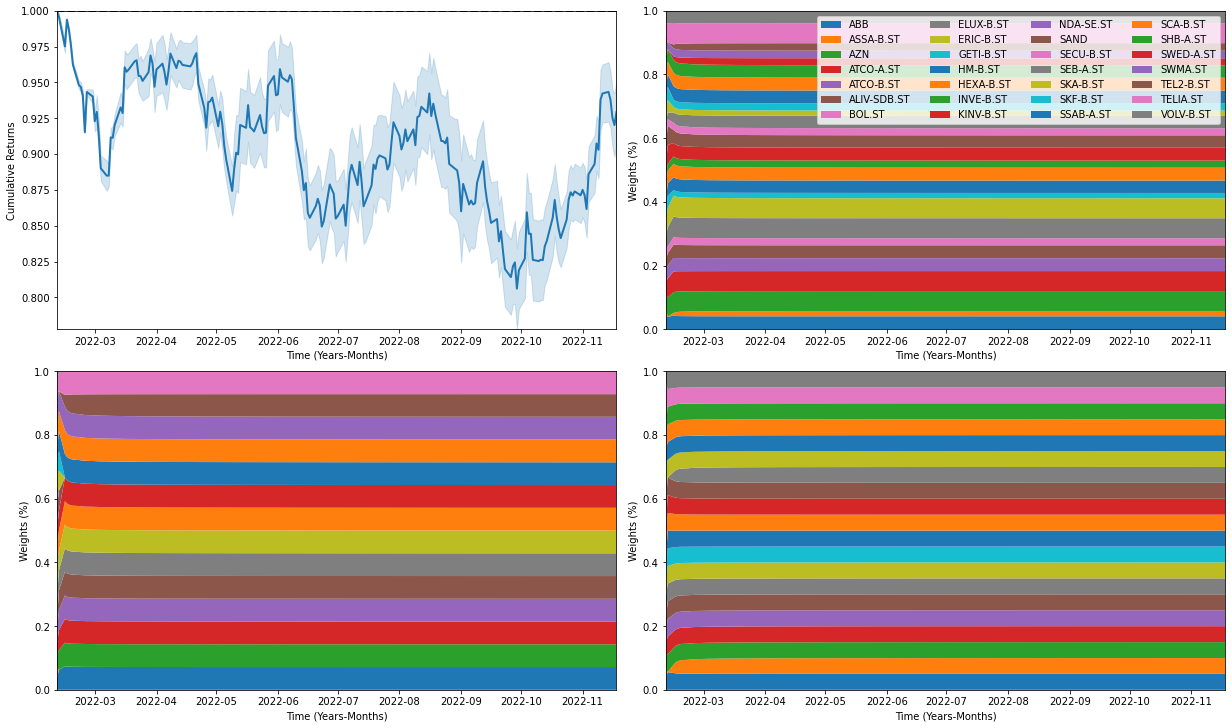

In [72]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

td3_mean = np.mean(np.array(Cumulative_returns_daily_drl_td3),axis=0)
td3_std = np.std(np.array(Cumulative_returns_daily_drl_td3),axis=0)

axs[0,0].plot(test_re_df.index, td3_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, td3_mean - td3_std, td3_mean + td3_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_td3_ = np.mean(np.array(portfolio_weights_td3),axis=0)
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right',ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_td3_ = portfolio_weights_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[1,0].stackplot(test_re_df.index,collective_df, labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_td3_ = portfolio_weights_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[1,1].stackplot(test_re_df.index,collective_df, labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

## Traditional approaches

In [77]:
! pip install pyportfolioopt

In [78]:
! pip install Riskfolio-Lib

    ERROR: Command errored out with exit status 1:
     command: 'D:\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Jerry John Thomas\\AppData\\Local\\Temp\\pip-install-phlrpoq3\\riskfolio-lib_63e084cb26f6448d88d8c521c4a2dfb6\\setup.py'"'"'; __file__='"'"'C:\\Users\\Jerry John Thomas\\AppData\\Local\\Temp\\pip-install-phlrpoq3\\riskfolio-lib_63e084cb26f6448d88d8c521c4a2dfb6\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Jerry John Thomas\AppData\Local\Temp\pip-pip-egg-info-ezh4rb6y'
         cwd: C:\Users\Jerry John Thomas\AppData\Local\Temp\pip-install-phlrpoq3\riskfolio-lib_63e084cb26f6448d88d8c521c4a2dfb6\
    Complete output (5 lines):
    Traceback (most recent call last):
     

In [79]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, objective_functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import riskfolio as rp

In [80]:
# working days in a year 252
window = 50
start = len(train_re_df)-window
data = re_df.iloc[start:]
data = data.reset_index(drop=True)

### Min-Variance Portfolio Allocation

In [81]:
portfolio_weights_min_var = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var.shape[0]):    
    sel = data.iloc[i:window+i]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S)
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True,
        )

    portfolio_weights_min_var[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

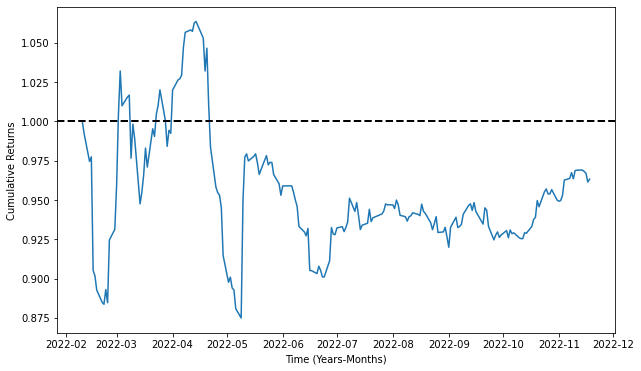

In [82]:
return_stocks = test_re_df.pct_change()
return_stocks_min_var = np.sum(return_stocks.multiply(portfolio_weights_min_var),axis=1)
Cumulative_returns_daily_min_var = (1+return_stocks_min_var).cumprod()
plt.plot(Cumulative_returns_daily_min_var)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

Text(0.5, 0, 'Time (Years-Months)')

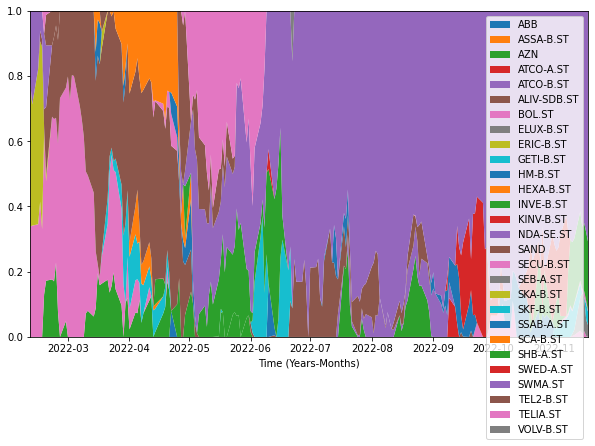

In [83]:
df = pd.DataFrame (portfolio_weights_min_var, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
plt.stackplot(test_re_df.index, collective_df, labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

### Min volatility

In [84]:
portfolio_weights_min_vol = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_vol.shape[0]):    
    sel = data.iloc[i:window+i]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S)  
    weights = ef.min_volatility() 
   
    portfolio_weights_min_vol[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

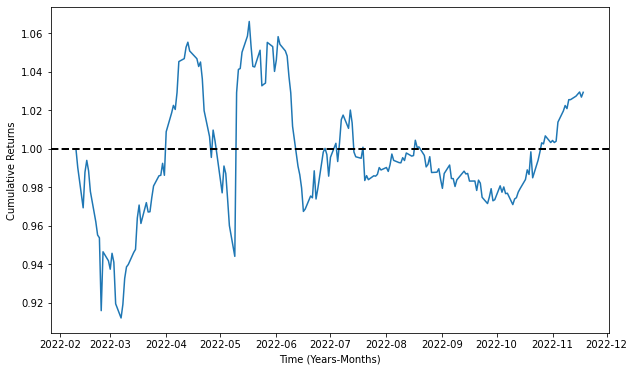

In [85]:
return_stocks_min_vol = np.sum(return_stocks.multiply(portfolio_weights_min_vol),axis=1)
Cumulative_returns_daily_min_vol = (1+return_stocks_min_vol).cumprod()
plt.plot(Cumulative_returns_daily_min_vol)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

Text(0.5, 0, 'Time (Years-Months)')

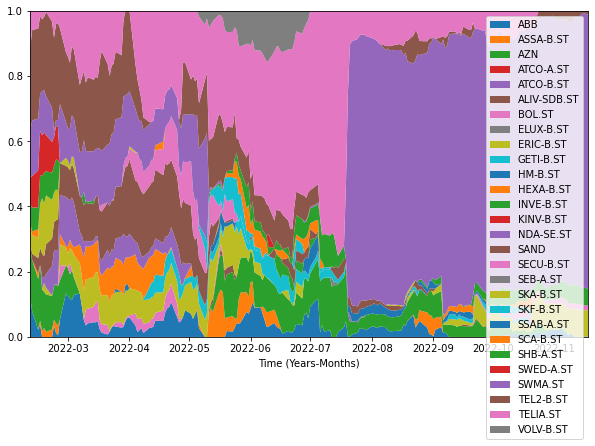

In [86]:
df = pd.DataFrame (portfolio_weights_min_vol, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
plt.stackplot(test_re_df.index, collective_df, labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

### Risk Parity

In [87]:
portfolio_weights_risk = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_risk.shape[0]):    
    sel = data.iloc[i:window+i]
   
    # Building the portfolio object
    port = rp.Portfolio(returns=sel)

    # Calculating optimal portfolio
    # Select method and estimate input parameters:
    method_mu='hist' # Method to estimate expected returns based on historical data.
    method_cov='hist' # Method to estimate covariance matrix based on historical data.

    port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

    model='Classic' # Could be Classic (historical) or FM (Factor Model)
    rm = 'MV' # Risk measure used, this time will be variance
    hist = True # Use historical scenarios for risk measures that depend on scenarios
    rf = 0 # Risk free rate
    b = None # Risk contribution constraints vector
    weights = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)
   
    portfolio_weights_risk[idx]=np.squeeze(np.array(weights))
    idx +=1  

D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another 

D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another 

D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another 

D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another 

D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another 

D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Text(0.5, 0, 'Time (Years-Months)')

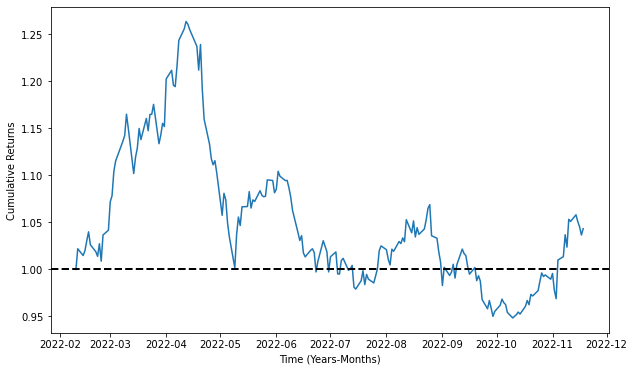

In [88]:
return_stocks = test_re_df.pct_change()
return_stocks_risk = np.sum(return_stocks.multiply(portfolio_weights_risk),axis=1)
Cumulative_returns_daily_risk = (1+return_stocks_risk).cumprod()
plt.plot(Cumulative_returns_daily_risk)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

Text(0.5, 0, 'Time (Years-Months)')

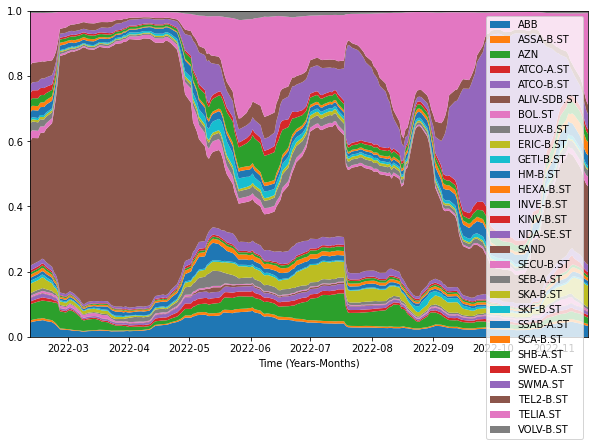

In [89]:
df = pd.DataFrame (portfolio_weights_risk, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
plt.stackplot(test_re_df.index,collective_df, labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

### Equal weighting

In [90]:
portfolio_weights_equal = np.ones([test_re_df.shape[0],test_re_df.shape[1]])/test_re_df.shape[1]

Text(0.5, 0, 'Time (Years-Months)')

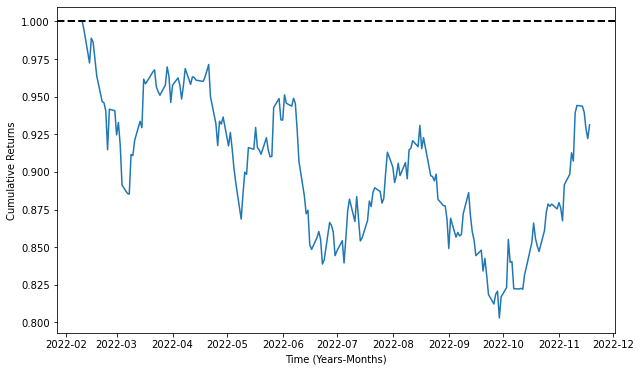

In [91]:
return_stocks = test_re_df.pct_change()
return_stocks_equal = np.sum(return_stocks.multiply(portfolio_weights_equal),axis=1)
Cumulative_returns_daily_equal = (1+return_stocks_equal).cumprod()
plt.plot(Cumulative_returns_daily_equal)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

Text(0.5, 0, 'Time (Years-Months)')

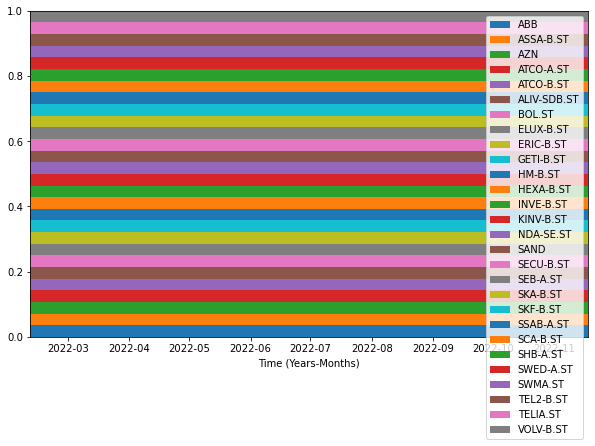

In [92]:
df = pd.DataFrame (portfolio_weights_equal, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
plt.stackplot(test_re_df.index,collective_df, labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

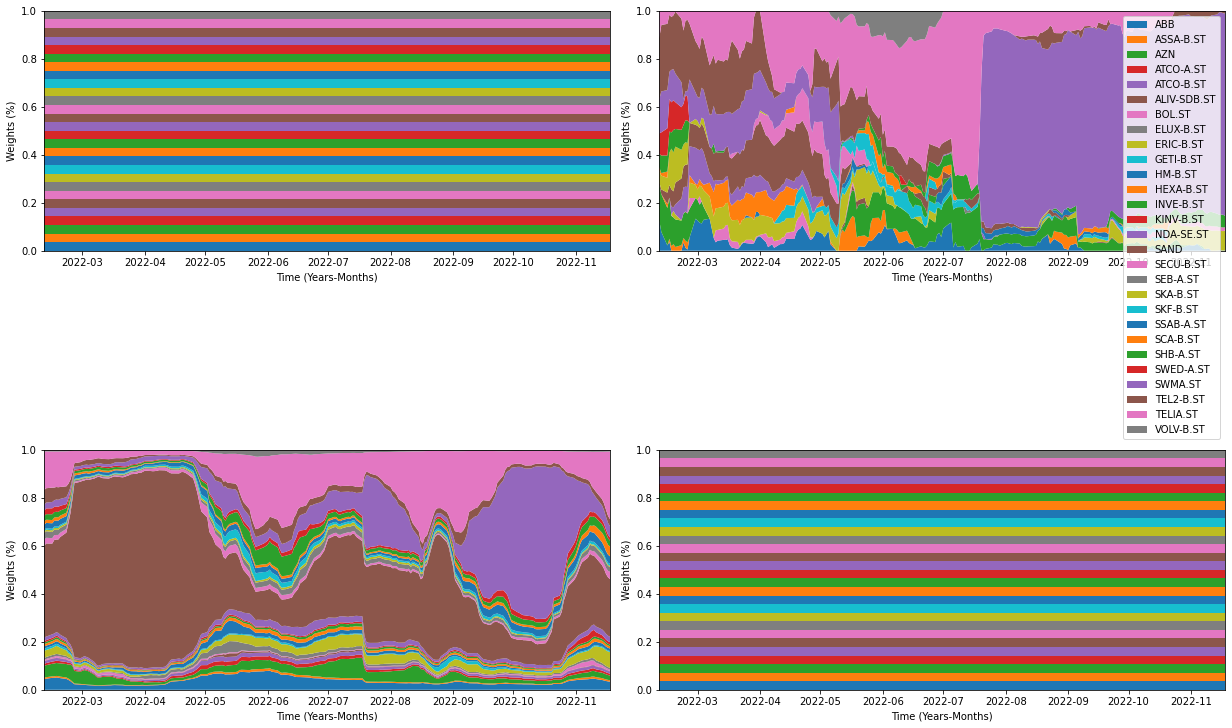

In [93]:

fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

df = pd.DataFrame (portfolio_weights_min_var, index = test_re_df.index, columns = tickers)
# axs[0,0].stackplot(test_re_df.index, df['AAPL'], df['GE'], df['JPM'], df['MSFT'], df['VOD'], df['NKE'], df['NVDA'], df['MMM'])
axs[0,0].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].set_ylabel("Weights (%)")
axs[0,0].set_xlabel("Time (Years-Months)")

df = pd.DataFrame (portfolio_weights_min_vol, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

df = pd.DataFrame (portfolio_weights_risk, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[1,0].stackplot(test_re_df.index, collective_df)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

df = pd.DataFrame (portfolio_weights_equal, index = test_re_df.index, columns = tickers)
collective_df = df['ABB'], df['ASSA-B.ST'], df['AZN'], df['ATCO-A.ST'], df['ATCO-B.ST'], df['ALIV-SDB.ST'], df['BOL.ST'], df['ELUX-B.ST'], df['ERIC-B.ST'], df['GETI-B.ST'], df['HM-B.ST'], df['HEXA-B.ST'], df['INVE-B.ST'], df['KINV-B.ST'], df['NDA-SE.ST'], df['SAND'], df['SECU-B.ST'], df['SEB-A.ST'], df['SKA-B.ST'], df['SKF-B.ST'], df['SSAB-A.ST'], df['SCA-B.ST'], df['SHB-A.ST'], df['SWED-A.ST'], df['SWMA.ST'], df['TEL2-B.ST'], df['TELIA.ST'], df['VOLV-B.ST'] 
axs[1,1].stackplot(test_re_df.index, collective_df)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")


plt.savefig('traditional0.png',bbox_inches='tight')

## Plotting all cumulative returns mtogether

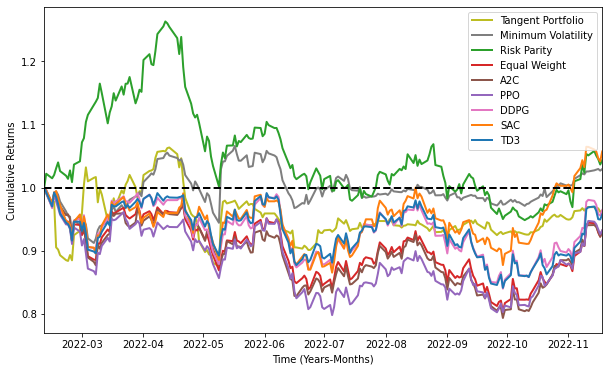

In [94]:
x = Cumulative_returns_daily_equal.index.values

plt.plot(x, Cumulative_returns_daily_min_var, color='tab:olive', label="Tangent Portfolio", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='tab:gray', label="Minimum Volatility", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='tab:green', label="Risk Parity", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='tab:red', label="Equal Weight", linewidth =2.0)

a2c = Cumulative_returns_daily_drl_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
plt.plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = Cumulative_returns_daily_drl_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
plt.plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = Cumulative_returns_daily_drl_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
plt.plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = Cumulative_returns_daily_drl_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
plt.plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = Cumulative_returns_daily_drl_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
plt.plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)

plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_max0.png',bbox_inches='tight')

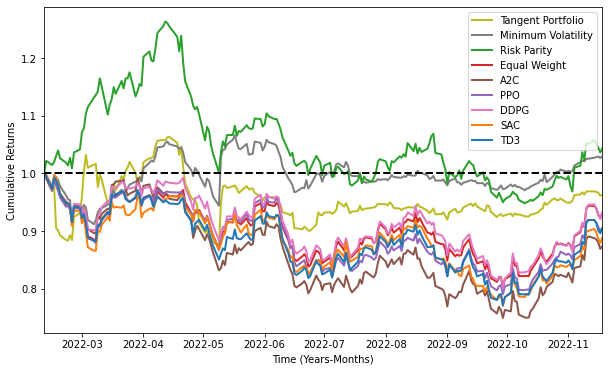

In [116]:
x = Cumulative_returns_daily_equal.index.values

plt.plot(x, Cumulative_returns_daily_min_var, color='tab:olive', label="Tangent Portfolio", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='tab:gray', label="Minimum Volatility", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='tab:green', label="Risk Parity", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='tab:red', label="Equal Weight", linewidth =2.0)

a2c = Cumulative_returns_daily_drl_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
plt.plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = Cumulative_returns_daily_drl_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
plt.plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = Cumulative_returns_daily_drl_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
plt.plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = Cumulative_returns_daily_drl_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
plt.plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = Cumulative_returns_daily_drl_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
plt.plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)

plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_min0.png',bbox_inches='tight')

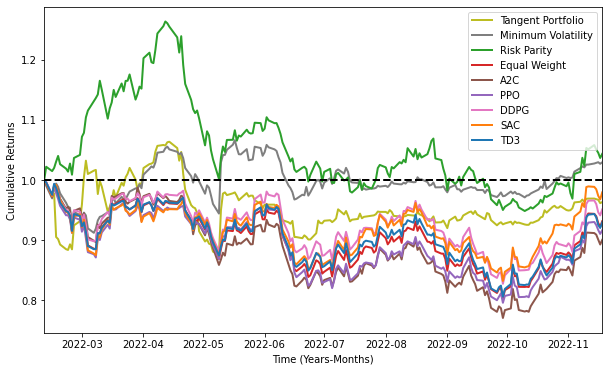

In [115]:
# portfolio_weights_td3_ = np.mean(np.array(portfolio_weights_td3),axis=0)
x = Cumulative_returns_daily_equal.index.values

plt.plot(x, Cumulative_returns_daily_min_var, color='tab:olive', label="Tangent Portfolio", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='tab:gray', label="Minimum Volatility", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='tab:green', label="Risk Parity", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='tab:red', label="Equal Weight", linewidth =2.0)

a2c = np.mean(np.array(Cumulative_returns_daily_drl_a2c),axis=0)
plt.plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = np.mean(np.array(Cumulative_returns_daily_drl_ppo),axis=0)
plt.plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = np.mean(np.array(Cumulative_returns_daily_drl_ddpg), axis = 0)
plt.plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = np.mean(np.array(Cumulative_returns_daily_drl_sac), axis = 0)
plt.plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = np.mean(np.array(Cumulative_returns_daily_drl_td3), axis=0)
plt.plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)
x
plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_average0.png',bbox_inches='tight')

In [96]:
portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo_),axis=1)

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c_),axis=1)

portfolio_weights_ddpg_ = portfolio_weights_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg_),axis=1)

portfolio_weights_sac_ = portfolio_weights_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac_),axis=1)

portfolio_weights_td3_ = portfolio_weights_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3_),axis=1)

In [97]:
portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo_),axis=1)

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c_),axis=1)

portfolio_weights_ddpg_ = portfolio_weights_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg_),axis=1)

portfolio_weights_sac_ = portfolio_weights_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac_),axis=1)

portfolio_weights_td3_ = portfolio_weights_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3_),axis=1)

In [98]:
return_stocks_ppo
return_stocks_a2c
return_stocks_ddpg
return_stocks_sac
return_stocks_td3
return_stocks_min_var
return_stocks_min_vol
return_stocks_risk
return_stocks_equal
print("")

## Other statistics

In [99]:
! pip install pyfolio

  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88698 sha256=731b6934777399293f78ca995bc263f264e93d353bb00675afd9c429fa03cc00
  Stored in directory: c:\users\jerry john thomas\appdata\local\pip\cache\wheels\75\c7\b9\986a1ba8adb2afce230e1a497dc11aeb33efef4fc8dfd6c649
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39790 sha256=fc952c06a57f170e4404cc5d488cbf228b1ba7a963d3e6a07f421bda40b2e1d1
  Stored in directory: c:\users\jerry john thomas\appdata\local\pip\cache\wheels\67\23\d1\a4ef8ff88dc9af7b0eeb1b6fd0d90c6057eaad5a2df25f4e3f
Successfully built pyfolio empyrical


In [100]:
import pyfolio

D:\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [101]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_ppo, set_context=False)

D:\anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2022-02-10
End date,2022-11-18
Total months,9
,Backtest
Annual return,-11.7%
Cumulative returns,-9.4%
Annual volatility,21.4%
Sharpe ratio,-0.47
Calmar ratio,-0.56
Stability,0.54
Max drawdown,-20.9%


IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
! shutdown -s -t 60